<a href="https://colab.research.google.com/github/samilacak/deneme0/blob/main/California_House_Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Importing the dataset

In [2]:
from google.colab import files
uploaded = files.upload()

Saving housing.csv to housing.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['housing.csv']), delimiter=",")

# Data Exploration

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.nunique()

longitude               844
latitude                862
housing_median_age       52
total_rooms            5926
total_bedrooms         1923
population             3888
households             1815
median_income         12928
median_house_value     3842
ocean_proximity           5
dtype: int64

In [6]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [7]:
df.shape

(20640, 10)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

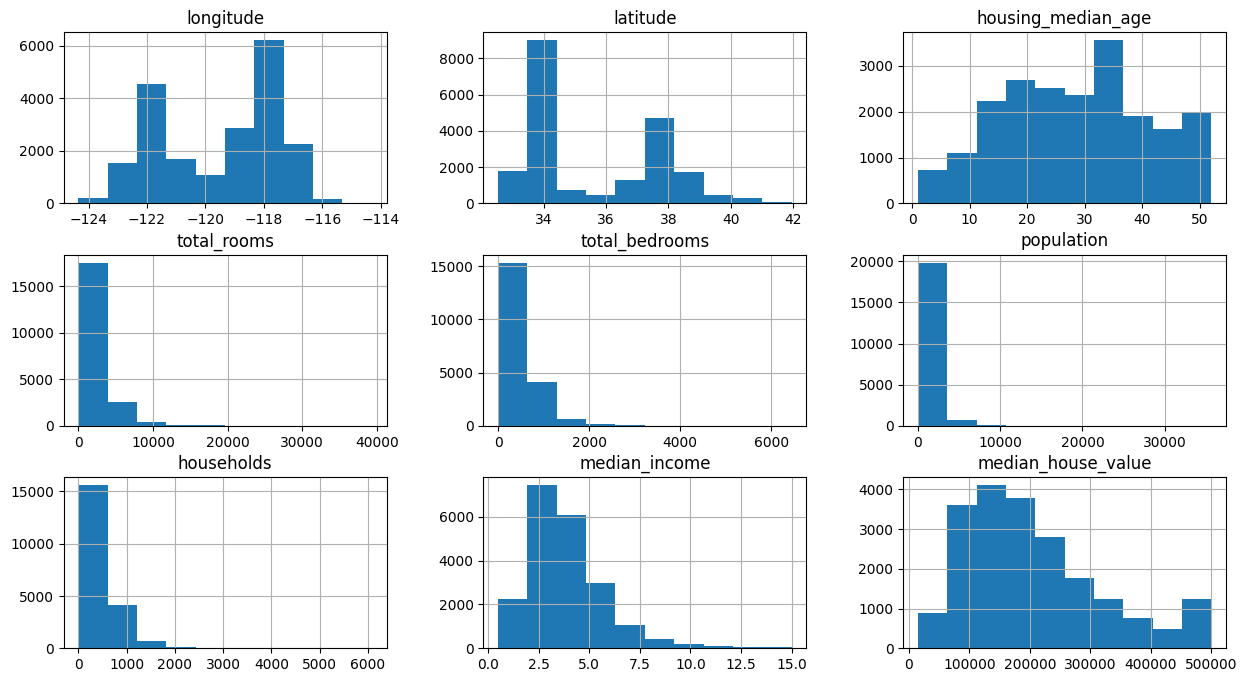

In [9]:
df.hist(figsize = (15,8))

# Handling Miising Values




### Null Values

In [10]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [11]:
median_value = df['total_bedrooms'].median()
df['total_bedrooms'].fillna(median_value, inplace=True)

In [12]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

# Corelation

In [13]:
df.corr()

<ipython-input-13-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069120,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066484,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.319026,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927058,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069120,-0.066484,-0.319026,0.927058,1.000000,0.873535,0.974366,-0.007617,0.049457
population,0.099773,-0.108785,-0.296244,0.857126,0.873535,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.974366,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007617,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049457,-0.024650,0.065843,0.688075,1.000000


<ipython-input-14-636a1a5291bd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.5)  # df.corr() ile korelasyon matrisini çizin


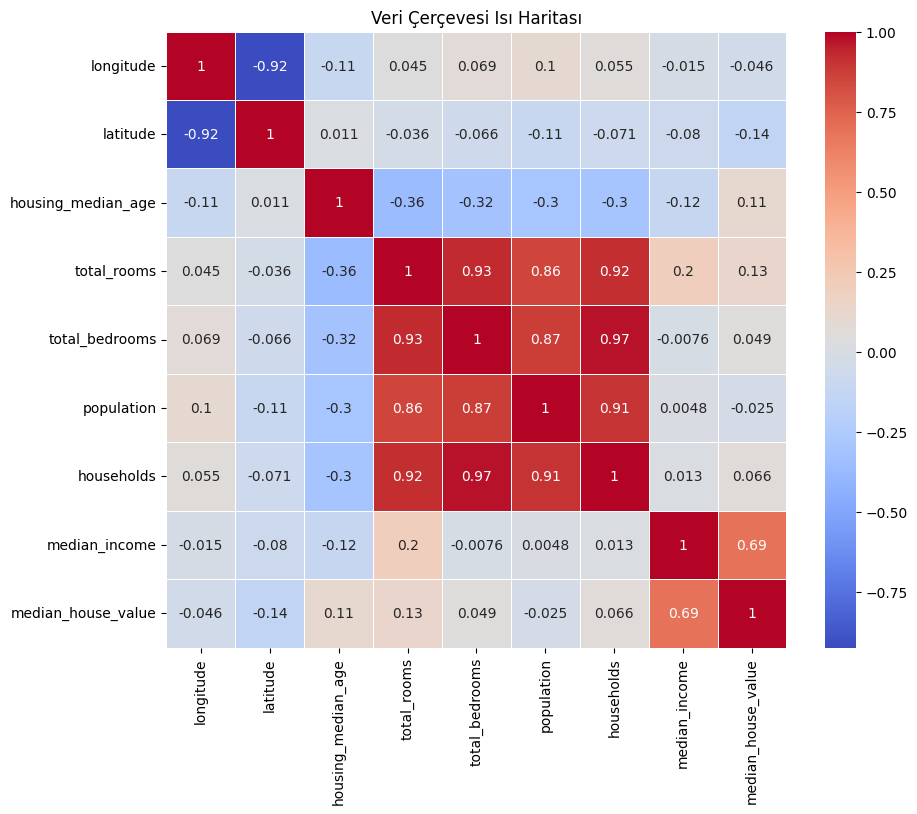

In [14]:
plt.figure(figsize=(10, 8))  # Isı haritası boyutunu ayarlayın
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.5)  # df.corr() ile korelasyon matrisini çizin
plt.title("Veri Çerçevesi Isı Haritası")  # Isı haritasının başlığı
plt.show()  # Isı haritasını göster

<Axes: xlabel='latitude', ylabel='longitude'>

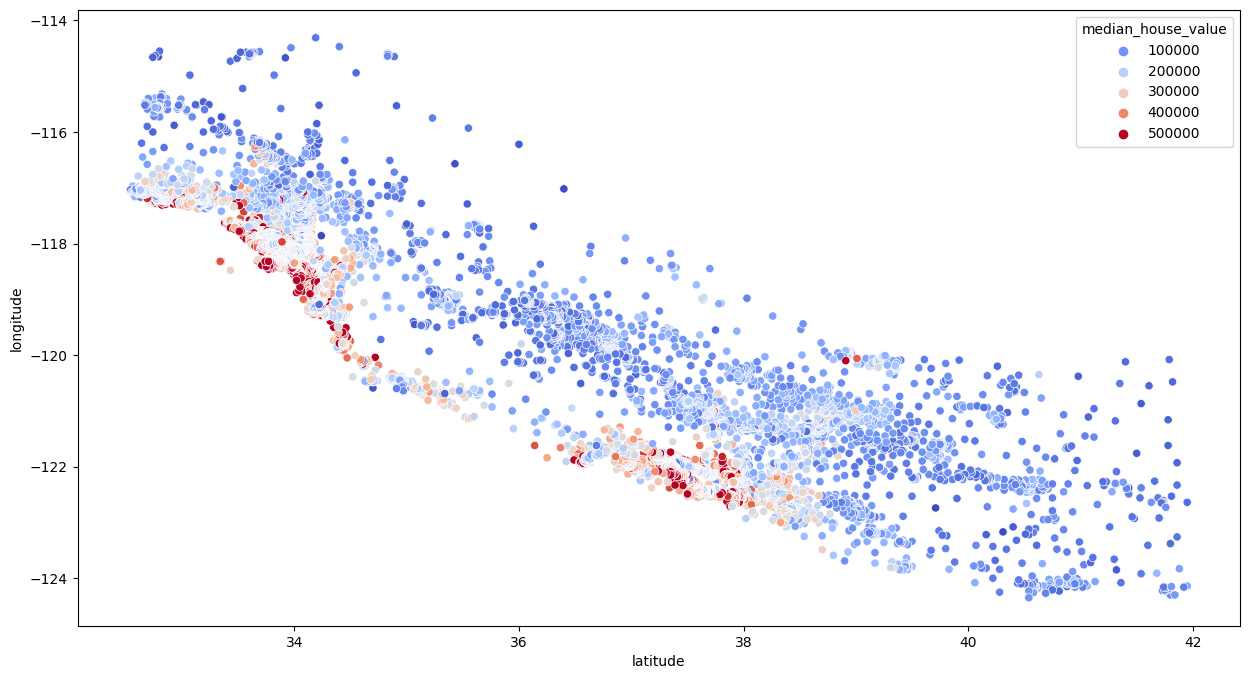

In [15]:
plt.figure(figsize = (15,8))
sns.scatterplot(x = "latitude", y = "longitude", data = df, hue = "median_house_value", palette = "coolwarm")

# Identify as X and y

In [16]:
X = df.drop(['median_house_value'], axis =1)
y = df['median_house_value']

# Splitting the dataset into the Training set and Test set

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Encoding
- One-hot encoding for ocean_proximity columns

In [18]:
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [19]:
X_train = X_train.join(pd.get_dummies(X_train.ocean_proximity)).drop(['ocean_proximity'], axis =1)
X_test = X_test.join(pd.get_dummies(X_test.ocean_proximity)).drop(['ocean_proximity'], axis =1)

In [20]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
12069,-117.55,33.83,6.0,502.0,76.0,228.0,65.0,4.2386,0,1,0,0,0
15925,-122.44,37.73,52.0,2381.0,492.0,1485.0,447.0,4.3898,0,0,0,1,0
11162,-118.00,33.83,26.0,1718.0,385.0,1022.0,368.0,3.9333,1,0,0,0,0
4904,-118.26,34.01,38.0,697.0,208.0,749.0,206.0,1.4653,1,0,0,0,0
4683,-118.36,34.08,52.0,2373.0,601.0,1135.0,576.0,3.1765,1,0,0,0,0


In [21]:
X_train.shape

(16512, 13)

## Avoıd From Dummy Variable

In [22]:
X_train = X_train.drop('<1H OCEAN', axis=1)

X_test = X_test.drop('<1H OCEAN', axis=1)

# Sablon -----  X = np.delete(X, 0, axis=1)

# Feature Scaling

In [23]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# PCA
- This did not work for our data.

In [ ]:
#from sklearn.decomposition import KernelPCA

#kpca = KernelPCA(n_components = 5, kernel = 'rbf')

#X_train = kpca.fit_transform(X_train)
#X_test = kpca.transform(X_test)

# Model Selection

## Training the Logistic Regression model on the Training set

In [33]:
from sklearn.ensemble import RandomForestRegressor

logistic_regressor = RandomForestRegressor(random_state= 42)

logistic_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [34]:
y_pred = logistic_regressor.predict(X_test)

In [35]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8240782056418394

## Training the Linear Regression model on the Training set

In [36]:
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()

linear_regressor.fit(X_train, y_train)

LinearRegression()

In [37]:
y_pred = linear_regressor.predict(X_test)

In [38]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6380862497737063

## XG Boost Regression

In [39]:
import xgboost as xgb

# XGBoost Regressor modelini tanımlayın
xgb_regressor = xgb.XGBRegressor(random_state=42)

# Modeli eğitin
xgb_regressor.fit(X_train, y_train)

# Modeli kullanarak tahminler yapın
y_pred = xgb_regressor.predict(X_test)


In [40]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8328301470142425